In [1]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [9]:
dt=pd.read_csv("delivery_time.csv")
print(dt.shape, "Delivery Time Data Shape")
print("="*30)




(21, 2) Delivery Time Data Shape


In [10]:
dt.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [11]:
#dt=dt.rename(columns={"Delivery_Time":"Delivery Time","Sorting_Time":"Sorting Time"})

In [12]:
dt.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## sklearn

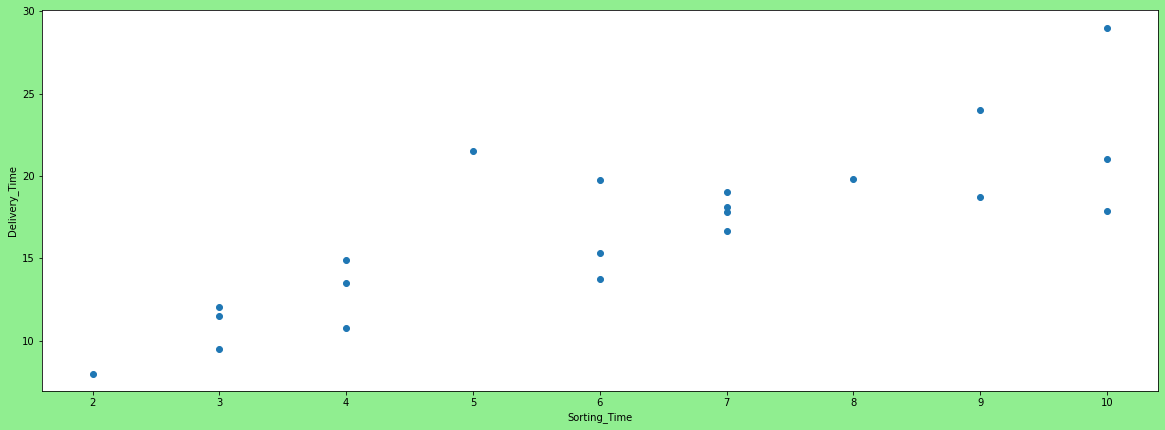

In [13]:
plt.figure(figsize=(20,7),facecolor="lightgreen")
plt.scatter(dt.Sorting_Time,dt.Delivery_Time)

plt.xlabel("Sorting_Time")
plt.ylabel("Delivery_Time")
plt.show()

In [14]:
dt.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [15]:
X=dt["Sorting_Time"].values.reshape(-1,1)
Y=dt["Delivery_Time"].values.reshape(-1,1)

In [16]:
# Test trainsplit for superwised learning
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(16, 1) (5, 1) (16, 1) (5, 1)


## Model Selection

In [17]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [18]:
print (lm.coef_)#alpha 
print (lm.intercept_)#beta


[[1.69659718]]
[5.77420601]


In [19]:
# Y = 6.374 + 1.74x

In [20]:
Y_pred=lm.predict(X_test)

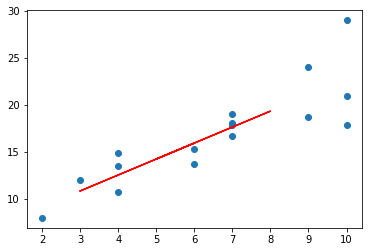

In [22]:
plt.scatter(X_train,Y_train)
plt.plot(X_test,Y_pred,color='red')
plt.show()

In [23]:
# Comparition
df=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted':Y_pred.flatten()})
df

,Actual,Predicted
0,11.50,10.863998
1,19.75,15.953789
2,21.50,14.257192
3,19.83,19.346983
4,9.50,10.863998


<function matplotlib.pyplot.show(close=None, block=None)>

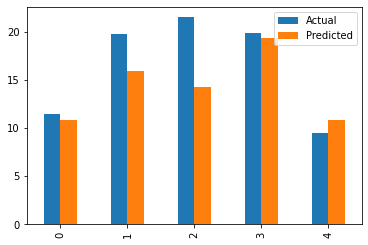

In [24]:
df.plot(kind="bar")
plt.show

In [25]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('r2_value:',r2_score(Y_test,Y_pred))
print('Mean Squared Eroor:',metrics.mean_squared_error(Y_test,Y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,Y_pred))

r2_value: 0.4248879851558435
Mean Squared Eroor: 13.873555959176912
Mean Absolute Error: 2.704407112201104


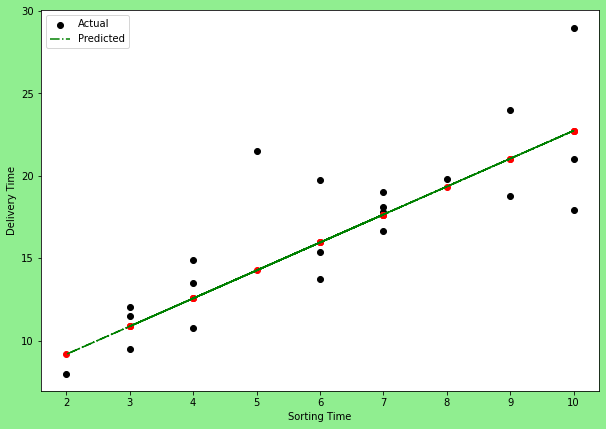

In [26]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dt.Sorting_Time,dt.Delivery_Time,color="black",label="Actual")
plt.plot(dt.Sorting_Time,lm.predict(X),label="Predicted",color="green",linestyle="-.")
plt.scatter(dt.Sorting_Time,lm.predict(X),color="red")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend(loc="best")
plt.show()

## Stats Model

In [61]:
dt.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [69]:
first_model=smf.ols("Delivery_Time~Sorting_Time",data=dt).fit()
first_model

In [70]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           3.98e-06
Time:                        11:31:19   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

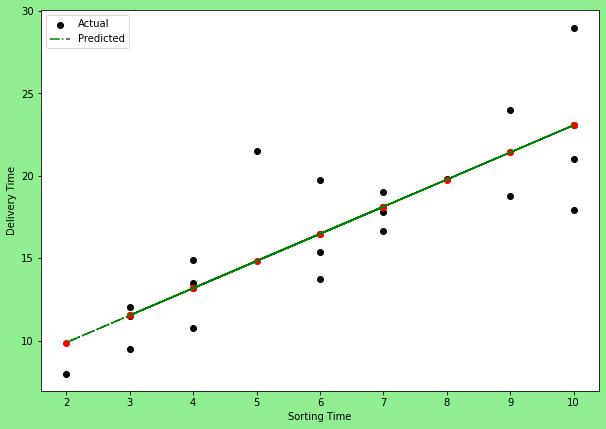

In [71]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dt.Sorting_Time,dt.Delivery_Time,color="black",label="Actual")
plt.plot(dt.Sorting_Time,first_model.predict(),label="Predicted",color="green",linestyle="-.")
plt.scatter(dt.Sorting_Time,first_model.predict(),color="red")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend(loc="best")
plt.show()

In [73]:
second_model=smf.ols("Delivery_Time~np.log(Sorting_Time)",data=dt).fit()
second_model

In [74]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           2.64e-06
Time:                        11:37:05   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_Time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
third_model=smf.ols("np.log(Delivery_Time)~Sorting_Time",data=dt).fit()
third_model

In [80]:
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Tue, 22 Nov 2022   Prob (F-statistic):           1.59e-06
Time:                           11:39:21   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
fourth_model=smf.ols("np.log(Delivery_Time)~np.log(Sorting_Time)",data=dt).fit()
fourth_model

In [82]:
fourth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Tue, 22 Nov 2022   Prob (F-statistic):           1.60e-07
Time:                           11:40:58   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

TypeError: cannot unpack non-iterable PathCollection object

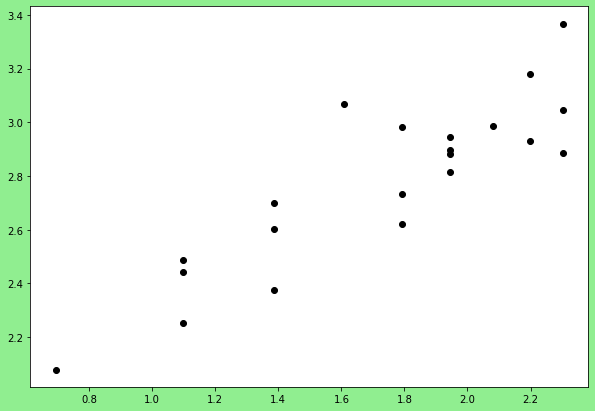

In [29]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
fig,sb=plt.scatter(np.log(dt.Sorting_Time),np.log(dt.Delivery_Time),color="black",label="Actual")
fig,lg=plt.plot(dt.Sorting_Time,fourth_model.predict(),label="Predicted",color="green",linestyle="-.")
fig,sr=plt.scatter(dt.Sorting_Time,fourth_model.predict(),color="red")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend(loc="best")
plt.show()

In [27]:
# So we'll choose fourth model as it is giving us the best r2 value.

In [90]:
dt["Sort_Sq"]=dt.Sorting_Time**2
fifth_model=smf.ols("Delivery_Time~Sort_Sq",data=dt).fit()
fifth_model

In [91]:
fifth_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Tue, 22 Nov 2022   Prob (F-statistic):           1.74e-05
Time:                        11:55:20   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2372      1.196      9.399      0.000       8.735      13.740
Sort_Sq        0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""